## Setup

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Define Input Size

In [4]:
IMAGE_SIZE = [224, 224]

## Dataset

In [5]:
train_path = '/content/drive/MyDrive/ThesisData/Keras/train'
valid_path = '/content/drive/MyDrive/ThesisData/Keras/valid'
test_path = '/content/drive/MyDrive/ThesisData/Keras/test'

In [6]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_path,batch_size=13,class_mode='categorical',target_size=(224,224))
vdata = ImageDataGenerator()
valdata = vdata.flow_from_directory(directory=valid_path,batch_size=13,class_mode='categorical',target_size=(224,224))
tdata = ImageDataGenerator()
testdata = tdata.flow_from_directory(directory=valid_path,batch_size=13,class_mode='categorical',target_size=(224,224))

Found 1923 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


## Model

In [7]:
pre_trained_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in pre_trained_model.layers:
  layer.trainable = False


In [9]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')
model = keras.models.Sequential([
    pre_trained_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
                                 ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                                 
Total params: 15970200 (60.92 MB)
Trainable params: 1255512 (4.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [11]:
# Lets fit our model
# Optimization
from tensorflow.keras.optimizers import Adam

opt = Adam(1e-4)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics = ['accuracy'])

## Training

In [14]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  traindata,
  validation_data=valdata,
  epochs=100,
  callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.41598, saving model to mymodel.h5
148/148 - 523s - loss: 0.3606 - accuracy: 0.8133 - val_loss: 0.4160 - val_accuracy: 0.8500 - 523s/epoch - 4s/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.41598
148/148 - 25s - loss: 0.2025 - accuracy: 0.8794 - val_loss: 0.4253 - val_accuracy: 0.8611 - 25s/epoch - 168ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.41598
148/148 - 24s - loss: 0.1293 - accuracy: 0.9314 - val_loss: 0.4597 - val_accuracy: 0.8611 - 24s/epoch - 164ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.41598
148/148 - 24s - loss: 0.0985 - accuracy: 0.9600 - val_loss: 0.5395 - val_accuracy: 0.8722 - 24s/epoch - 162ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.41598
148/148 - 26s - loss: 0.0648 - accuracy: 0.9724 - val_loss: 0.5726 - val_accuracy: 0.8889 - 26s/epoch - 178ms/step
Epoch 6/100

Epoch 6: val_loss did not improve from 0.41598
148/148 - 24s - loss: 0.0501 - accuracy: 0.9860 - val_loss: 0.6373 - val_accuracy: 0.8778 - 24s/epoch - 162ms/step
Epoch 7/100

Epoch 7: val_loss did not improve from 0.41598
148/148 - 24s - loss: 0.0421 - accuracy: 0.9906 - val_loss: 0.6608 - val_accu

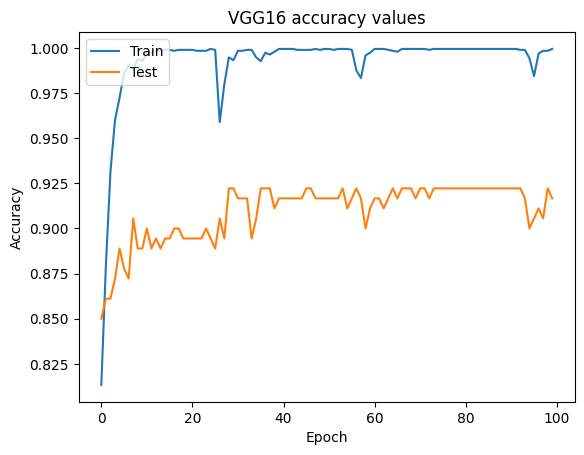

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('VGG16 accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

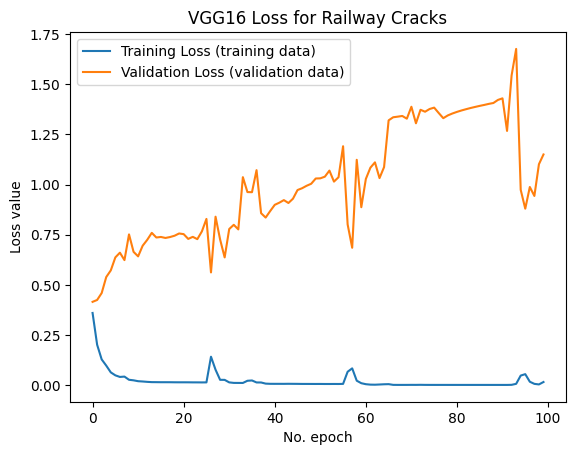

In [16]:
plt.plot(model_history.history['loss'], label='Training Loss (training data)')
plt.plot(model_history.history['val_loss'], label='Validation Loss (validation data)')
plt.title('VGG16 Loss for Railway Cracks')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [17]:
model.save('vgg16-cracks.keras')


## Testing

In [18]:
from keras.models import load_model
from google.colab.patches import cv2_imshow
trainedModel = load_model('/content/vgg16-cracks.keras')

# Define class names
class_names = ['cracks', 'nocracks']
testCrack_path = '/content/drive/MyDrive/ThesisData/Keras/test/crack'
testNoncrack_path = '/content/drive/MyDrive/ThesisData/Keras/test/nocrack'


Single Image Prediction

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/ThesisData/Keras/test/crack/Image-081_jpg.rf.396b72611e16c2b95ed58be25e1e4670.jpg")
image_resized= cv2.resize(img, (224,224))
cv2_imshow(img)
cv2.waitKey(0)
img=np.expand_dims(image_resized,axis=0)
print(img.shape)
class_names = ['cracks','nocracks']

pred=trainedModel.predict(img)
pr_cl=np.argmax(pred,axis=1)
output_class=class_names[np.argmax(pred)]

print("The predicted class is", output_class)



Multiple Image Prediction

In [23]:
from google.colab.patches import cv2_imshow
import cv2

# Initialize a dictionary to count the number of images per class
class_counts = {class_name: 0 for class_name in class_names}


# List all image files in the folder
image_files = [f for f in os.listdir(testNoncrack_path) if f.endswith(".jpg")]

for image_file in image_files:
    image_path = os.path.join(testNoncrack_path, image_file)
    img = cv2.imread(image_path)
    image_resized = cv2.resize(img, (224, 224))
    cv2_imshow(image_resized)
    cv2.waitKey(0)
    img = np.expand_dims(image_resized, axis=0)
    print("Image shape:", img.shape)

    # Make predictions
    pred = trainedModel.predict(img)
    predicted_class_index = np.argmax(pred)
    output_class = class_names[predicted_class_index]

    # Update the class count
    class_counts[output_class] += 1

    print("Predicted class:", output_class)
    print("Class probabilities:", pred)
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

Count how many per class predictions

In [24]:
# Print the counts for each class
for class_name, count in class_counts.items():
    print(f"Count of {class_name}: {count}")

Count of cracks: 9
Count of nocracks: 10
